# Análise Campanhas de Marketing
Objetivo: Maximizar lucro da próxima campanha com uma seleção otimizada de leads
<br><br>

Esse notebook é continuação do 'eda.ipynb'.

Para chegar nesse objetivo, de posse com a base de dados dos leads aleatórios que temos,o plano será:

- Construir uma segmentação de clientes para lançar campanhas com leads em que teremos uma maior taxa de conversão 
- Ter um modelo preditivo que irá ajudar a:
    - Reduzir o disparo das campanhas (redução de custos)
    - Aumentar a taxa de conversão (aumento de receita)

Estamos no passo 1.

In [1]:
### Bibliotecas

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
### Importação dos dados limpos
df = pd.read_csv('data/data_clean.csv')

In [3]:
### Features Escolhidas para Nossa Segmetação
features = ['Recency', 'Total_Channels_Purchased', 'Total_Accepted_Cmps', 'Customer_Age', 
            'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth']


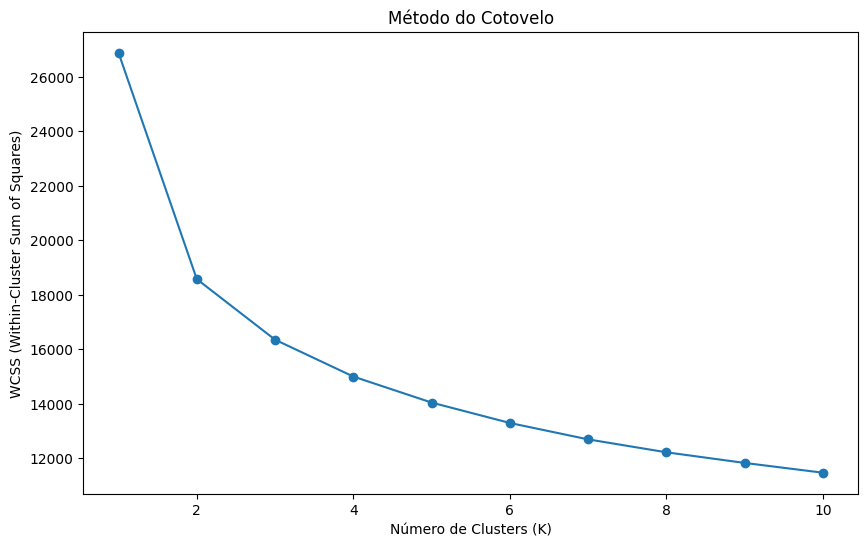

In [4]:
### Normalização dos Dados
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Método do Cotovelo - para selecionar o número de cluster do KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Vamos escolher K = 5, pois após esse valor, a diferença entre os clusters se tornam pequenas (como mostrado no gráfico).

Lembrando que o propósito da segmentação deve ser focado no negócio. 
Logo, o foco dessa segmentação é auxiliar o time de marketing na seleção de leads para suas campanhas. 

In [5]:
### K-means com 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

In [6]:
### Tamanho de cada cluster
cluster_sizes = df['Cluster'].value_counts().sort_index()
cluster_percentages = (cluster_sizes / len(df) * 100).round(2)
cluster_percentages

Cluster
0    21.65
1    21.74
2    21.65
3     8.48
4    26.47
Name: count, dtype: float64

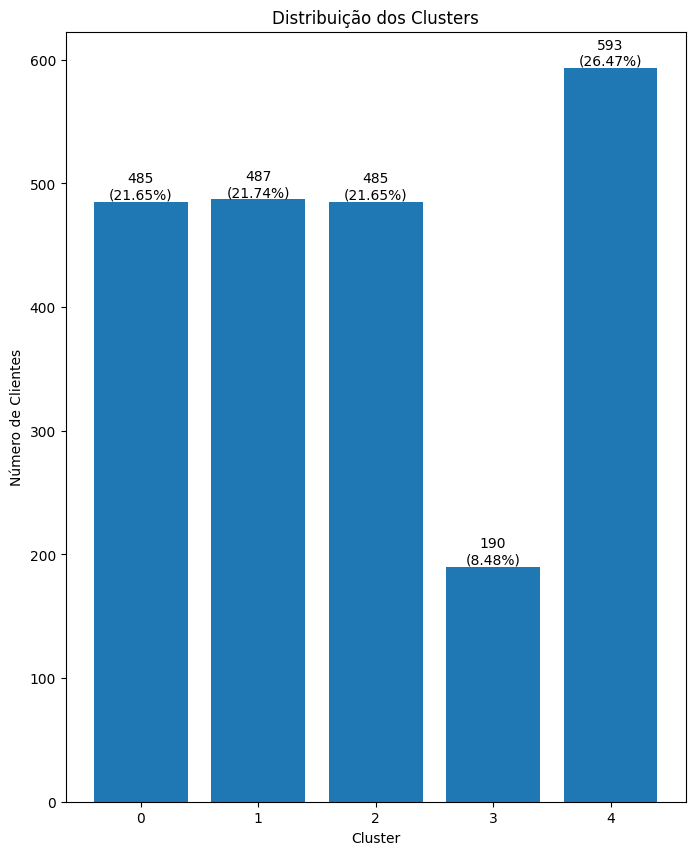

In [7]:
### Distribuição dos clusters
plt.figure(figsize=(8, 10))
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.title('Distribuição dos Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
for i, v in enumerate(cluster_sizes):
    plt.text(i, v, f'{v}\n({cluster_percentages[i]}%)', ha='center', va='bottom')
plt.show()

In [8]:
### Visualizar características médias de cada cluster
cluster_means = df.groupby('Cluster')[features].mean()
print("\nMédia das características por cluster:")
print(cluster_means)


Média das características por cluster:
           Recency  Total_Channels_Purchased  Total_Accepted_Cmps  \
Cluster                                                             
0        49.315464                  2.985567             0.138144   
1        50.878850                  3.000000             0.174538   
2        47.917526                  3.000000             0.232990   
3        51.031579                  2.989474             1.989474   
4        47.846543                  1.919056             0.040472   

         Customer_Age        Income    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                       
0           18.156701  71466.176289  488.795876  74.012371       397.820619   
1           12.094456  49605.235113  209.104723  11.250513        70.388090   
2           23.059794  46182.923711  326.457732  12.391753        91.257732   
3           17.257895  80755.523684  904.000000  50.889474       481.057895   
4 

Para facilitar o entendimento das segmentações por parte do time de Marketing, vamos nomear os clusters fazendo uma analogia para ajudar a lembrar das características de cada grupo.

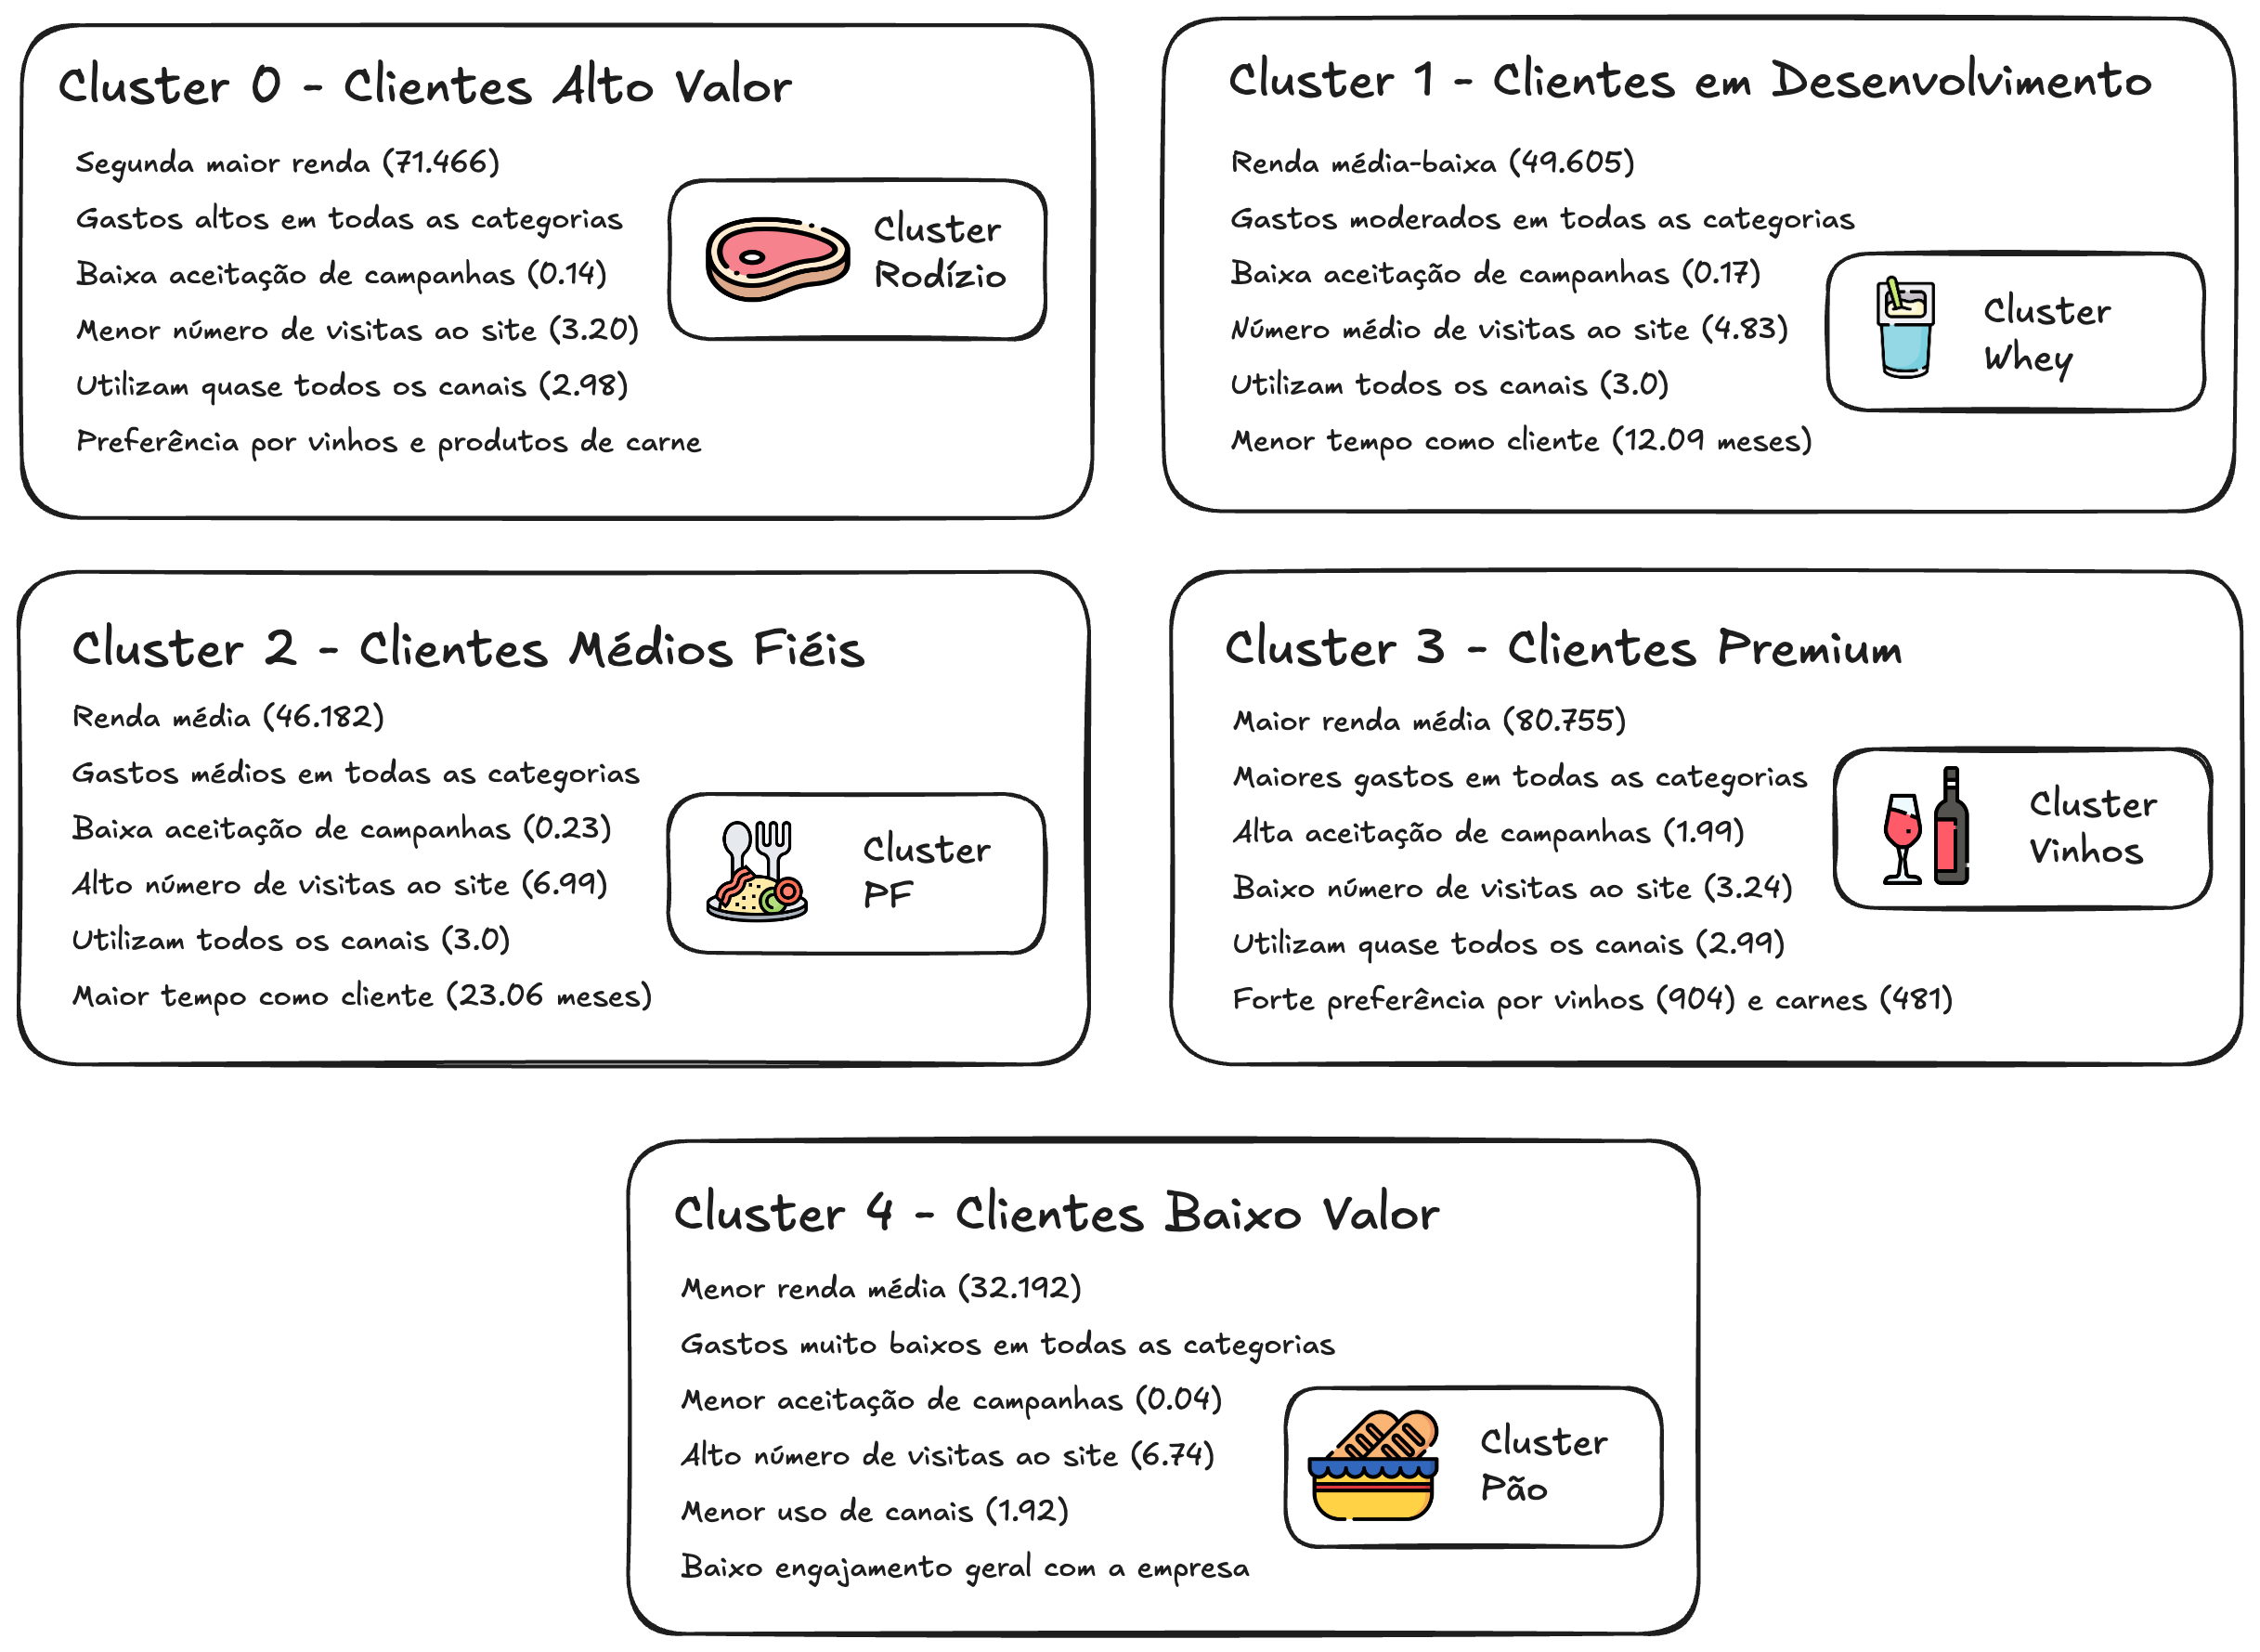

In [9]:
### Exportar a base tratada com a classificação de cluster em csv
df.to_csv('data/data_clean_cluster.csv', index=False)